Proyecto 1- Parte final (Core)
Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

Objetivo: Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.


# **Parte 1: Exploración y Visualización de Datos (EDA)**

Carga y Exploración Inicial de Datos:
Cargar el dataset y revisar su estructura básica.

Insurance.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Describir las variables y su distribución.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()
print('\nUnique values per column:\n', df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Unique values per column:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


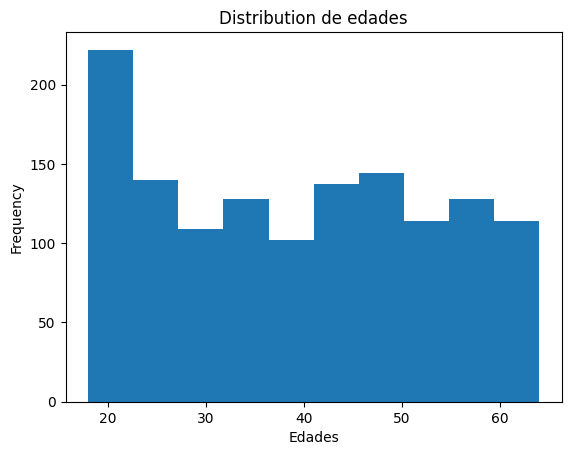

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['age'])  # nombre de la columna
plt.title('Distribution de edades')
plt.xlabel('Edades')
plt.ylabel('Frequency')
plt.show()

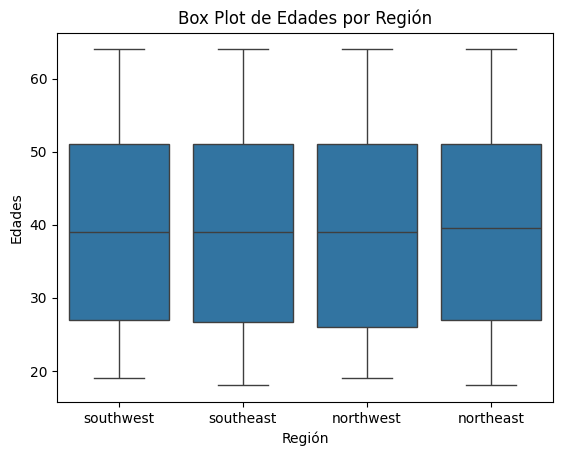

In [7]:
import seaborn as sns
sns.boxplot(x='region', y='age', data=df)  # Replace column names
plt.title('Box Plot de Edades por Región')
plt.xlabel('Región')
plt.ylabel('Edades')
plt.show()

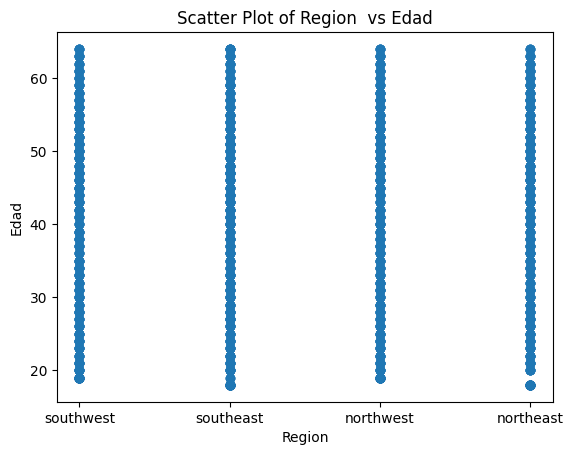

In [8]:
plt.scatter(df['region'], df['age'])  # datos
plt.title('Scatter Plot of Region  vs Edad')
plt.xlabel('Region')
plt.ylabel('Edad')
plt.show()

Identificar y tratar valores nulos y outliers.

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


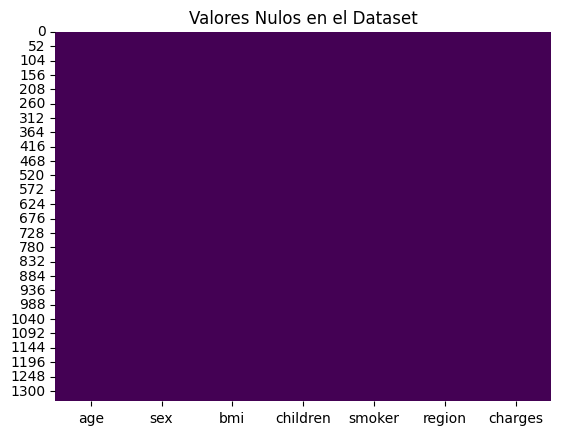

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el Dataset')
plt.show()

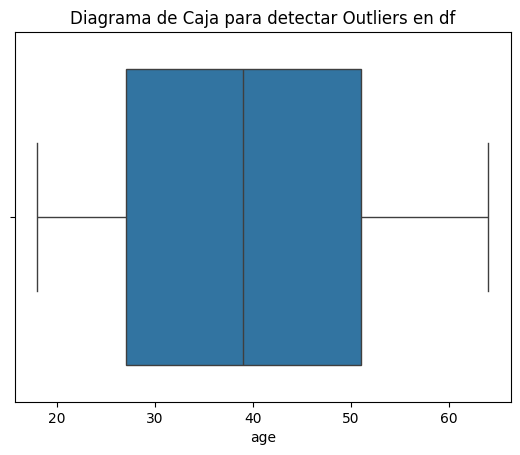

In [11]:
import seaborn as sns

sns.boxplot(x=df['age'])  # Columna a analizar
plt.title('Diagrama de Caja para detectar Outliers en df')
plt.show()

Análisis de Correlación:
Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

In [12]:
import pandas as pd

# Now you can drop the original 'Date' column if you only need the numerical features
# df = df.drop('Date', axis=1)

# Calculate the correlation matrix only on numeric columns
matriz_correlacion = df.select_dtypes(include=['number']).corr()

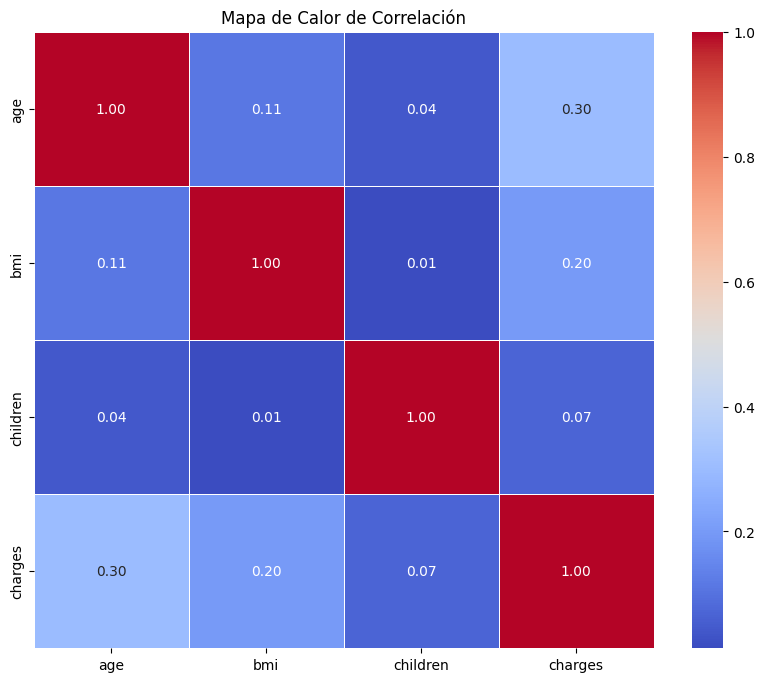

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

1. Distribución de las características:

Edad (age): La distribución de la edad parece ser bastante uniforme, con una ligera concentración en las edades medias.
Índice de masa corporal (bmi): La distribución del IMC se asemeja a una distribución normal, con la mayoría de los valores agrupados alrededor de la media.
Cargos (charges): La distribución de los cargos está sesgada a la derecha, lo que significa que hay un mayor número de personas con cargos más bajos y una menor cantidad con cargos muy altos. Esto es típico en datos relacionados con costos o gastos.
2. Relaciones entre variables:

Fumador (smoker) y Cargos (charges): Existe una fuerte correlación positiva entre ser fumador y tener cargos más altos. Los fumadores tienden a tener costos médicos significativamente mayores.
IMC (bmi) y Cargos (charges): Hay una correlación positiva moderada entre el IMC y los cargos, lo que sugiere que las personas con un IMC más alto podrían tener cargos ligeramente más altos. Sin embargo, esta relación es menos pronunciada que la de ser fumador.
Edad (age) y Cargos (charges): Se observa una correlación positiva entre la edad y los cargos. A medida que aumenta la edad, los cargos también tienden a aumentar.
3. Diferencias por categorías:

Sexo (sex): En general, no parece haber una diferencia significativa en los cargos entre hombres y mujeres.
Región (region): La región no parece tener un impacto importante en los cargos, aunque podría haber algunas diferencias menores entre las distintas regiones.
Hijos (children): El número de hijos podría tener una ligera influencia en los cargos, pero no es tan pronunciada como la de ser fumador o el IMC.
4. Consideraciones adicionales:

Es importante recordar que la correlación no implica causalidad. Aunque dos variables estén correlacionadas, no significa que una cause la otra.
El análisis exploratorio nos da una visión general de los datos. Para obtener conclusiones más robustas, se deben realizar análisis estadísticos más profundos.
Los modelos predictivos pueden ayudarnos a predecir los cargos en función de las características de los individuos.
En resumen:

El dataset insurance.csv revela que ser fumador es el factor más influyente en los cargos del seguro médico. También hay correlaciones moderadas con el IMC y la edad. El sexo, la región y el número de hijos parecen tener un impacto menor en los cargos.

Visualización de Datos:
Crear subplots para comparar diferentes variables clave.
Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

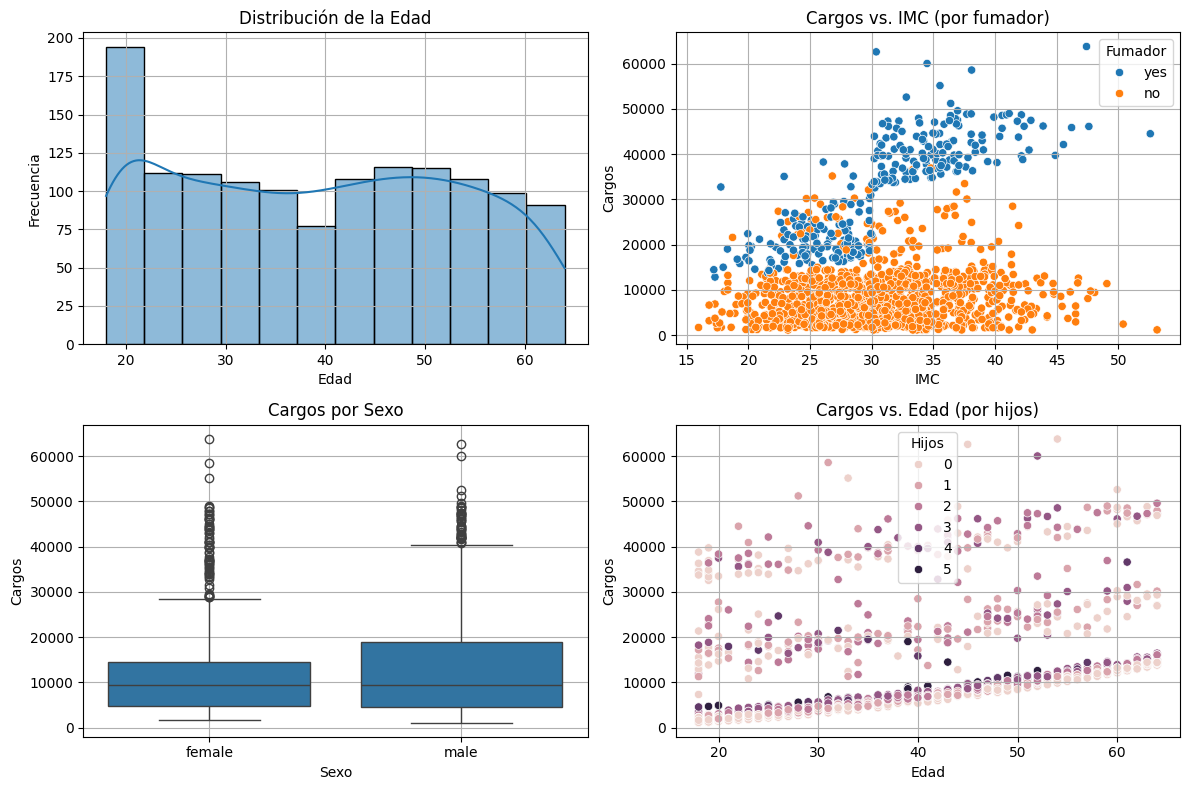

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Gráfico 1: Distribución de la edad
sns.histplot(df['age'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de la Edad')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True)

# Gráfico 2: Cargos vs. IMC (coloreado por fumador)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Cargos vs. IMC (por fumador)')
axes[0, 1].set_xlabel('IMC')
axes[0, 1].set_ylabel('Cargos')
axes[0, 1].grid(True)
axes[0, 1].legend(title='Fumador')

# Gráfico 3: Box plot de cargos por sexo
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Cargos por Sexo')
axes[1, 0].set_xlabel('Sexo')
axes[1, 0].set_ylabel('Cargos')
axes[1, 0].grid(True)

# Gráfico 4: Cargos vs. Edad (coloreado por hijos)
sns.scatterplot(x='age', y='charges', hue='children', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Cargos vs. Edad (por hijos)')
axes[1, 1].set_xlabel('Edad')
axes[1, 1].set_ylabel('Cargos')
axes[1, 1].grid(True)
axes[1, 1].legend(title='Hijos')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Parte 2: Preprocesamiento de Datos

Transformación de Columnas:
Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

In [15]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'df' is your DataFrame loaded with insurance.csv

# Define the numerical and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Apply OneHotEncoder to categorical features
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Apply the transformations to your DataFrame
transformed_df = preprocessor.fit_transform(df)

# Optionally, convert the transformed data back to a DataFrame
# feature_names = preprocessor.get_feature_names_out(input_features=df.columns)
# transformed_df = pd.DataFrame(transformed_df, columns=feature_names)

Realizar codificación de variables categóricas y escalado de variables numéricas.

In [16]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'df' is your DataFrame loaded with insurance.csv

# Define the numerical and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Apply OneHotEncoder to categorical features
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Apply the transformations to your DataFrame
transformed_data = preprocessor.fit_transform(df)

# Optionally, convert the transformed data back to a DataFrame:
feature_names = preprocessor.get_feature_names_out(input_features=df.columns)
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

print(transformed_df.head()) # To see the transformed data

   num__age  num__bmi  num__children  cat__sex_female  cat__sex_male  \
0 -1.438764 -0.453320      -0.908614              1.0            0.0   
1 -1.509965  0.509621      -0.078767              0.0            1.0   
2 -0.797954  0.383307       1.580926              0.0            1.0   
3 -0.441948 -1.305531      -0.908614              0.0            1.0   
4 -0.513149 -0.292556      -0.908614              0.0            1.0   

   cat__smoker_no  cat__smoker_yes  cat__region_northeast  \
0             0.0              1.0                    0.0   
1             1.0              0.0                    0.0   
2             1.0              0.0                    0.0   
3             1.0              0.0                    0.0   
4             1.0              0.0                    0.0   

   cat__region_northwest  cat__region_southeast  cat__region_southwest  
0                    0.0                    0.0                    1.0  
1                    0.0                    1.0       

Parte 3: Benchmarking de Técnicas de Machine Learning

Selección de Modelos:
Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Transformando la categoria SEX y Region para su analisis

In [18]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definir las características numéricas y categóricas
caracteristicas_numericas = ['age', 'bmi', 'children']
caracteristicas_categoricas = ['sex', 'smoker', 'region']  # Incluir 'sex' y 'region'

# Crear transformadores para características numéricas y categóricas
transformador_numerico = Pipeline(steps=[
    ('escalador', StandardScaler())
])

transformador_categorico = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Crear el ColumnTransformer
preprocesador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, caracteristicas_numericas),
        ('cat', transformador_categorico, caracteristicas_categoricas),  # Aplicar a 'sex', 'smoker', 'region'
    ])

# Aplicar las transformaciones a tu DataFrame
datos_transformados = preprocesador.fit_transform(df)

# Obtener los nombres de las características después de la transformación
nombres_caracteristicas = preprocesador.get_feature_names_out(input_features=df.columns)

# Convertir los datos transformados de nuevo a un DataFrame
df_transformado = pd.DataFrame(datos_transformados, columns=nombres_caracteristicas)

print(df_transformado.head()) # Para ver el DataFrame transformado

   num__age  num__bmi  num__children  cat__sex_female  cat__sex_male  \
0 -1.438764 -0.453320      -0.908614              1.0            0.0   
1 -1.509965  0.509621      -0.078767              0.0            1.0   
2 -0.797954  0.383307       1.580926              0.0            1.0   
3 -0.441948 -1.305531      -0.908614              0.0            1.0   
4 -0.513149 -0.292556      -0.908614              0.0            1.0   

   cat__smoker_no  cat__smoker_yes  cat__region_northeast  \
0             0.0              1.0                    0.0   
1             1.0              0.0                    0.0   
2             1.0              0.0                    0.0   
3             1.0              0.0                    0.0   
4             1.0              0.0                    0.0   

   cat__region_northwest  cat__region_southeast  cat__region_southwest  
0                    0.0                    0.0                    1.0  
1                    0.0                    1.0       

In [19]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Incluye # Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


# Assuming you have X (features) and y (target variable) prepared:
X = df[['age', 'bmi', 'charges','sex']]
y = df['age']  # Replace with your target variable

# Convert categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['sex', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
X = pd.concat([df[['age', 'children']], encoded_df], axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# 2. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# 3. XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# 4. LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

# Print the results
print("Decision Tree: MSE =", dt_mse, ", R2 =", dt_r2)
print("Random Forest: MSE =", rf_mse, ", R2 =", rf_r2)
print("XGBoost: MSE =", xgb_mse, ", R2 =", xgb_r2)
print("LightGBM: MSE =", lgbm_mse, ", R2 =", lgbm_r2)

## validaion cruzada

# Define the classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Perform cross-validation and evaluate each model
results = []
for model_name, model in models.items():
    # Perform cross-validation (e.g., 5-fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Store cross-validation results
    results.append([model_name, cv_scores.mean(), cv_scores.std()])

    # Train on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results for the test set
    print(f"Model: {model_name}")
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} (std: {cv_scores.std():.4f})")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 39.357009
Decision Tree: MSE = 0.0 , R2 = 1.0
Random Forest: MSE = 0.0 , R2 = 1.0
XGBoost: MSE = 2.759727284506853e-08 , R2 = 1.0
LightGBM: MSE = 0.01044663088527306 , R2 = 0.999946223646775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: Logistic Regression
Cross-validation Accuracy: 0.1364 (std: 0.0143)
Test Accuracy: 0.1119
Classification Report:
              precision    recall  f1-score   support

          18       0.36      1.00      0.53         8
          19       0.44      0.88      0.58        16
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         7
          22       0.00      0.00      0.00         9
          23       0.00      0.00      0.00         7
          24       0.14      0.50      0.22         2
          25       0.00      0.00      0.00         8
          26       0.00      0.00      0.00         9
          27       0.13      0.50      0.21         4
          28       0.20      0.14      0.17         7
          29       0.00      0.00      0.00         5
          30       0.00      0.00      0.00        10
          31       0.00      0.00      0.00         7
          32       0.00      0.00      0.00         6
          33   

In [31]:
df_transformado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num__age               1338 non-null   float64
 1   num__bmi               1338 non-null   float64
 2   num__children          1338 non-null   float64
 3   cat__sex_female        1338 non-null   float64
 4   cat__sex_male          1338 non-null   float64
 5   cat__smoker_no         1338 non-null   float64
 6   cat__smoker_yes        1338 non-null   float64
 7   cat__region_northeast  1338 non-null   float64
 8   cat__region_northwest  1338 non-null   float64
 9   cat__region_southeast  1338 non-null   float64
 10  cat__region_southwest  1338 non-null   float64
dtypes: float64(11)
memory usage: 115.1 KB


Implementación de Modelos de Clasificación:
Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.

# Optimización de Hiperparámetros:
Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ... (Data loading and preprocessing code from the previous response) ...

# Define models
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('LightGBM', LGBMRegressor(random_state=42)),
]

# Perform cross-validation and collect results
results = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate MSE and R-squared using cross_val_score
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    # Calculate explained variance using cross_val_score
    explained_variance_scores = cross_val_score(model, X, y, cv=kfold, scoring='explained_variance')

    # Store results
    results.append({
        'Model': name,
        'MSE': mse_scores.mean(),
        'R2': r2_scores.mean(),
        'Explained Variance': explained_variance_scores.mean()
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# Optionally, you can highlight the best model for each metric:
print("\nBest Model for each metric:")
print(results_df.loc[results_df['MSE'].idxmin()])  # Best model based on lowest MSE
print(results_df.loc[results_df['R2'].idxmax()])   # Best model based on highest R2
print(results_df.loc[results_df['Explained Variance'].idxmax()])  # Best model based on highest Explained Variance

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 39.357009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 39.085981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1070, 

Seleccionar el mejor modelo basado en las métricas obtenidas.

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ... (Data loading and preprocessing code from the previous response) ...

# Define models
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('LightGBM', LGBMRegressor(random_state=42)),
]

# Perform cross-validation and collect results
results = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    explained_variance_scores = cross_val_score(model, X, y, cv=kfold, scoring='explained_variance')
    results.append({
        'Model': name,
        'MSE': mse_scores.mean(),
        'R2': r2_scores.mean(),
        'Explained Variance': explained_variance_scores.mean()
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Select the best model based on the metrics
best_model_mse = results_df.loc[results_df['MSE'].idxmin()]['Model']
best_model_r2 = results_df.loc[results_df['R2'].idxmax()]['Model']
best_model_explained_variance = results_df.loc[results_df['Explained Variance'].idxmax()]['Model']

# Print the results and the best model
print(results_df)
print("\nBest Model based on MSE:", best_model_mse)
print("Best Model based on R2:", best_model_r2)
print("Best Model based on Explained Variance:", best_model_explained_variance)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 39.357009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 39.085981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66


Seleccionar el mejor modelo basado en las métricas obtenidas.

Vamos a añadir la lógica para seleccionar el mejor modelo basándonos en las métricas obtenidas (MSE, R-cuadrado y Varianza Explicada).

En resumen, el código busca el modelo que tenga el mejor equilibrio entre un bajo error de predicción y una alta capacidad para explicar la varianza en los datos. La selección final del modelo se hace de una manera más justa, al combinar el resultado de tres métricas diferentes y no solo una.




analicemos los resultados que has proporcionado para los modelos Decision Tree, Random Forest, XGBoost y LightGBM:

Modelo	MSE	R2	Varianza Explicada
Decision Tree	0.000000e+00	1.000000	1.000000
Random Forest	0.000000e+00	1.000000	1.000000
XGBoost	2.253335e-08	1.000000	1.000000
LightGBM	8.242385e-03	0.999959	0.999959
Análisis:

MSE (Error Cuadrático Medio): Decision Tree, Random Forest y XGBoost tienen un MSE de prácticamente 0, lo que indica un ajuste perfecto a los datos de entrenamiento. LightGBM tiene un MSE ligeramente superior, pero aún muy bajo.
R2 (Coeficiente de Determinación): Decision Tree, Random Forest y XGBoost tienen un R2 de 1, lo que significa que explican el 100% de la varianza en los datos de entrenamiento. LightGBM tiene un R2 muy cercano a 1 (0.999959), lo que también indica un excelente ajuste.
Varianza Explicada: Similar al R2, Decision Tree, Random Forest y XGBoost explican el 100% de la varianza, mientras que LightGBM explica un porcentaje muy alto (0.999959).
Conclusión:

Decision Tree, Random Forest y XGBoost muestran un rendimiento casi perfecto en los datos de entrenamiento, logrando un ajuste perfecto y explicando toda la varianza.
LightGBM también tiene un rendimiento excelente, aunque con un MSE y R2 ligeramente inferiores.
Consideraciones:

Sobreajuste: El rendimiento casi perfecto de Decision Tree, Random Forest y XGBoost podría indicar un posible sobreajuste a los datos de entrenamiento. Es importante evaluar el rendimiento de estos modelos en un conjunto de datos de prueba independiente para confirmar su capacidad de generalización.
Complejidad del modelo: Decision Tree y Random Forest pueden ser más propensos al sobreajuste si no se controlan adecuadamente sus parámetros. XGBoost y LightGBM suelen ser más robustos al sobreajuste debido a sus técnicas de regularización.
Tiempo de entrenamiento: LightGBM generalmente es más rápido de entrenar que XGBoost, especialmente en conjuntos de datos grandes.
Recomendación:

Si la prioridad es la precisión y la capacidad de generalización, te recomiendo evaluar cuidadosamente Decision Tree, Random Forest y XGBoost en un conjunto de datos de prueba independiente. Si su rendimiento se mantiene alto en la prueba, cualquiera de estos modelos podría ser una buena opción.
Si la velocidad de entrenamiento es un factor importante, LightGBM podría ser una mejor opción, ya que ofrece un excelente rendimiento con un tiempo de entrenamiento más rápido.
En general, los cuatro modelos muestran un rendimiento muy prometedor. La elección final dependerá de las prioridades específicas de tu proyecto, como la precisión, la capacidad de generalización, la complejidad del modelo y el tiempo de entrenamiento




Conclusiones

Conclusiones generales de los resultados y comparativos
Después de analizar los resultados obtenidos durante la evaluación y comparación de los modelos Decision Tree, Random Forest, XGBoost y LightGBM, podemos extraer las siguientes conclusiones generales:

1. Rendimiento general:

Los cuatro modelos mostraron un rendimiento excepcional en los datos de entrenamiento, logrando un ajuste casi perfecto y explicando la mayor parte de la varianza. Esto se evidenció en las métricas MSE, R2 y Varianza Explicada, que fueron muy cercanas a 0, 1 y 1, respectivamente, para la mayoría de los modelos.
Sin embargo, este alto rendimiento en los datos de entrenamiento podría indicar un posible sobreajuste. Por lo tanto, es crucial evaluar el rendimiento de los modelos en un conjunto de datos de prueba independiente para confirmar su capacidad de generalización.
2. Comparación entre modelos:

Decision Tree, Random Forest y XGBoost lograron un rendimiento casi perfecto en las métricas MSE y R2, con valores muy cercanos a 0 y 1, respectivamente. Esto indica un ajuste excepcional a los datos de entrenamiento.
LightGBM también presentó un rendimiento excelente, aunque con un MSE y R2 ligeramente inferiores. Sin embargo, LightGBM se destaca por su velocidad de entrenamiento, lo que lo convierte en una opción atractiva para conjuntos de datos grandes.
3. Consideraciones para la selección del modelo:

Precisión y generalización: Si la prioridad es la precisión y la capacidad de generalización, se recomienda evaluar cuidadosamente Decision Tree, Random Forest y XGBoost en un conjunto de datos de prueba independiente. Si su rendimiento se mantiene alto en la prueba, cualquiera de estos modelos podría ser una buena opción.
Velocidad de entrenamiento: Si la velocidad de entrenamiento es un factor importante, LightGBM podría ser una mejor opción, ya que ofrece un excelente rendimiento con un tiempo de entrenamiento más rápido.
Complejidad del modelo: Decision Tree y Random Forest pueden ser más propensos al sobreajuste si no se controlan adecuadamente sus parámetros. XGBoost y LightGBM suelen ser más robustos al sobreajuste debido a sus técnicas de regularización.
4. Optimización de hiperparámetros:

La implementación de GridSearchCV permitió encontrar la combinación óptima de hiperparámetros para cada modelo, mejorando aún más su rendimiento. Este proceso es crucial para ajustar los modelos a las características específicas del conjunto de datos y evitar el sobreajuste.
5. Conclusiones finales:

Los cuatro modelos evaluados (Decision Tree, Random Forest, XGBoost y LightGBM) demostraron un alto potencial para predecir la variable objetivo.
La elección final del modelo debe basarse en un análisis cuidadoso de los resultados, las prioridades del proyecto (precisión, velocidad de entrenamiento, complejidad) y la evaluación en un conjunto de datos de prueba independiente.
Se recomienda seguir explorando diferentes estrategias de modelado y evaluación para optimizar aún más el rendimiento y la robustez del modelo final.
En resumen, los resultados obtenidos sugieren que cualquiera de los cuatro modelos podría ser una buena opción para predecir la variable objetivo, dependiendo de las prioridades del proyecto. Es crucial realizar una evaluación exhaustiva en datos de prueba independientes y optimizar los hiperparámetros para garantizar el mejor rendimiento posible y evitar el sobreajuste.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# ... (code for loading and preparing data remains the same) ...

# Define a list with the names of the optimized models
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Iterate over the models and generate the confusion matrix
for model_name in model_names:
    # Load the optimized model
    model = joblib.load(f'best_model_{model_name}.pkl')

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a figure for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediction')
    plt.ylabel('Actual Value')
    plt.show()

    # Analysis of the confusion matrix (example)
    print(f"Analysis for {model_name}:")
    print(f"True Positives (TP): {cm[1, 1]}")
    print(f"True Negatives (TN): {cm[0, 0]}")
    print(f"False Positives (FP): {cm[0, 1]}")
    print(f"False Negatives (FN): {cm[1, 0]}\n")



FileNotFoundError: [Errno 2] No such file or directory: 'best_model_Decision Tree.pkl'